<a href="https://colab.research.google.com/github/BrajanNieto/stats-prob-py/blob/main/01.%20Ex-Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability Concepts - Exercises in Python**

---

This script includes exercises and practical implementations of key probability concepts using Python. It is designed to help reinforce theoretical knowledge through hands-on coding examples.

**Topics Covered:**  

* **Fundamental Probability Rules**: Addition and Multiplication rules, Conditional probability, and Bayes' theorem.  
* **Discrete and Continuous Distributions**: Binomial, Poisson, Normal, and others.  
* **Random Variables and Simulations**: Monte Carlo methods and more.  

**Author:**  
Bach. Brajan Esteban Nieto Espinoza  
[brajan.nieto@utec.edu.pe](mailto:brajan.nieto@utec.edu.pe)

---

In [1]:
#lib
import numpy as np

## Ex 1:
Three people enter an elevator on the first floor of a building with 10 floors. Each person is equally likely to choose any floor from 2 to 10 (independently). What is the probability that all three people want to go to consecutive floors?


In [ ]:
np.random.randint(2,11,3)

array([7, 7, 6])

In [ ]:
np.random.seed(100)
n_simulaciones = 10_000_000


resultados = np.random.randint(2, 11, (n_simulaciones, 3))
ordenados = np.sort(resultados, axis=1)
es_consecutivo = (ordenados[:, 1] - ordenados[:, 0] == 1) & (ordenados[:, 2] - ordenados[:, 1] == 1)
probabilidad = np.sum(es_consecutivo) / n_simulaciones

# Resultado
print(f"La probabilidad de que las 3 personas elijan pisos consecutivos es: {probabilidad:.6f}")


La probabilidad de que las 3 personas elijan pisos consecutivos es: 0.057647



#### Solution  

#### 1. Sample Space:  
Each person has 9 possible choices (floors 2 to 10).  
For three people, the total number of combinations is:  
$9^3 = 729$

#### 2. Favorable Outcomes:  
To have consecutive floors, the chosen floors can be represented as \([x, x+1, x+2]\), where \(x\) is the smallest floor:  
- $x$ can take values from $2$ to $8$ (as $x+2 \leq 10$).
- For each \(x\), the three people can arrive at the floors in any order. There are \(3! = 6\) permutations for each set of consecutive floors.

Thus, the total number of favorable outcomes is:  
7 * 6 = 42

#### 3. Probability:  
The probability is the ratio of favorable outcomes to the total sample space:  
$P = \frac{\text{Favorable Outcomes}}{\text{Sample Space}} = \frac{42}{729} = \frac{14}{243} \approx 0.0576$

## Ex 2:

In [2]:
import random

# Definir la urna con las bolas: 'R' representa roja, 'A' representa azul
urna = ['R', 'R', 'R', 'A']

# Número de simulaciones
n_simulaciones = 100000

# Contadores
total_veces_primera_roja = 0
total_veces_segunda_roja = 0

for _ in range(n_simulaciones):
    # Extraer dos bolas sin reemplazo
    seleccionadas = random.sample(urna, 2)

    # Contar casos
    if seleccionadas[0] == 'R':
        total_veces_primera_roja += 1
        if seleccionadas[1] == 'R':
            total_veces_segunda_roja += 1

# Calcular probabilidades
prob_primera_roja = total_veces_primera_roja / n_simulaciones
prob_segunda_roja_dado_primera_roja = total_veces_segunda_roja / total_veces_primera_roja

# Mostrar resultados
print(f"Probabilidad de que la primera bola sea roja: {prob_primera_roja:.5f}")
print(f"Probabilidad de que la segunda bola sea roja dado que la primera fue roja: {prob_segunda_roja_dado_primera_roja:.5f}")


Probabilidad de que la primera bola sea roja: 0.74975
Probabilidad de que la segunda bola sea roja dado que la primera fue roja: 0.66438


# Variables aleatorias discretas

## **Distribución binomial**

 $X$ tiene distribución binomial con parámetros $n$ y $p$ si

 $$P(X=k)= \binom{n}{k} p^{k}(1-p)^{n-k}$$

 para $k=0, \dots, n$.

In [2]:
from scipy.stats import binom

Los valores de la distribución son dados por el método pmf (*probability mass function*)


In [2]:
n=5
p=0.1
k=3
binom.pmf(k, n, p)

0.0081

Gráfica de la distribución

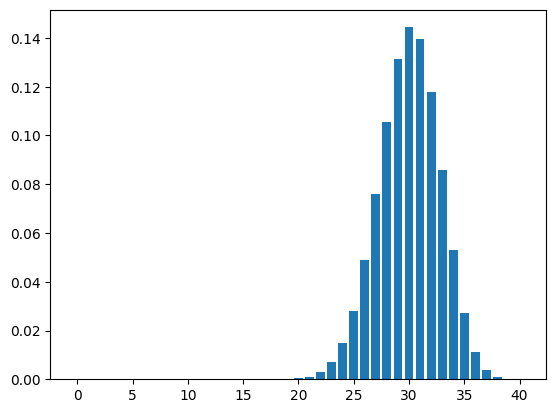

In [3]:
import matplotlib.pyplot as plt
import numpy as np
n=40
p=0.75
plt.bar( np.arange(n+1),binom.pmf(np.arange(n+1), n, p))
plt.show()

La distribución acumulada se calcula con el método cdf (cumulative density function)

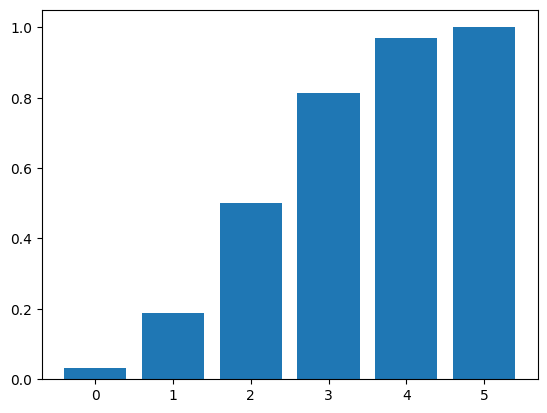

In [4]:
n=5
p=0.5
plt.bar( np.arange(n+1),binom.cdf(np.arange(n+1), n, p))
plt.show()

Data simulada y su histograma. Notemos que es consistente con la distribución.

In [7]:
n=5
p=0.5
binom.rvs(n,  p, size=100)

array([2, 2, 4, 1, 0, 1, 1, 4, 2, 4, 3, 1, 3, 3, 3, 3, 2, 4, 3, 2, 4, 2,
       2, 3, 1, 3, 1, 3, 3, 4, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1,
       4, 4, 2, 2, 3, 3, 4, 2, 3, 2, 5, 0, 0, 0, 0, 3, 2, 4, 2, 4, 2, 2,
       1, 4, 0, 3, 2, 2, 2, 3, 4, 2, 2, 3, 5, 2, 2, 3, 1, 4, 3, 2, 2, 3,
       4, 2, 2, 4, 2, 2, 4, 4, 0, 3, 4, 1])

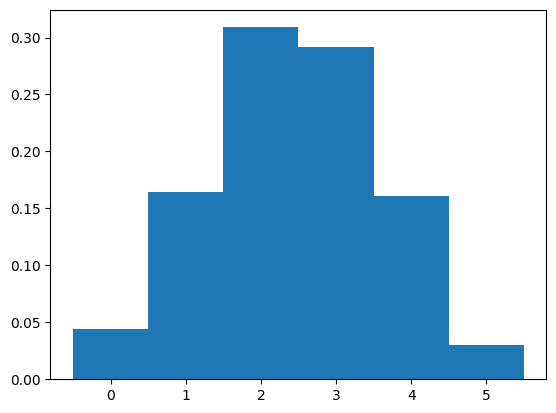

In [6]:
n=5
p=0.5
plt.hist(binom.rvs(n, p, size=1000), bins=np.arange(-0.5, 6.5, 1), density=True), #false cuenta true brinda probabilidades
plt.show()

## **Ejercicio 1:**
Se muestra un aviso online a $40$ personas. La probabilidad de que alguien haga click en el aviso es de $0.75$. Halle la probabilidad de los siguientes eventos.

a) exactamente $20$ personas hagan click.

b) a lo más $20$ personas hacen click.

c) al menos $20$ personas hacen click.

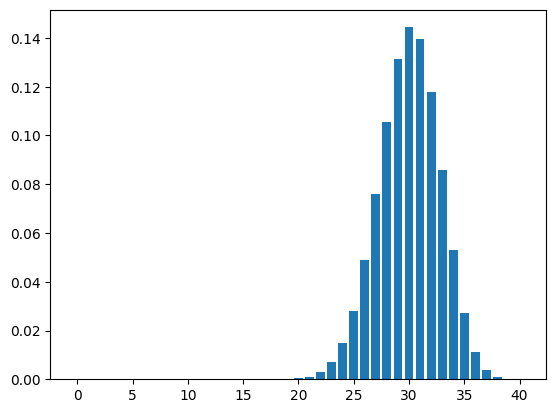

In [8]:
import matplotlib.pyplot as plt
import numpy as np
n=40
p=0.75
plt.bar( np.arange(n+1),binom.pmf(np.arange(n+1), n, p))
plt.show()

In [9]:
n=40
p=0.75
binom.pmf(20, n, p)

0.00039757702137157343

In [10]:
binom.cdf(20, n, p)

0.0005724311071761386

In [11]:
1-binom.cdf(19, n, p)

0.9998251459141955

In [12]:
n = 1000
p = 0.24
k = 200

1- binom.cdf(k-1,n,p)

0.9988753619900307

## **Distribución Geométrica**

   $X$ tiene distribución binomial con parámetro $p$ si

 $$P(X=k)= (1-p)^{k-1}p$$

 para $k=1,2, \dots$.

In [13]:
from scipy.stats import geom

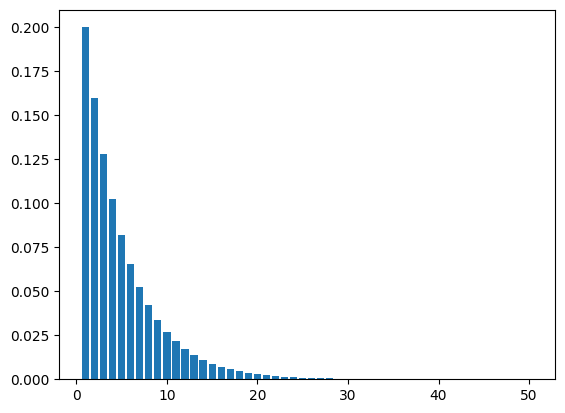

In [14]:
p=0.2
n=50 #solo para graficar
plt.bar(np.arange(1,n+1),geom.pmf(np.arange(1, n+1), p))
plt.show()

La distribución acumulada

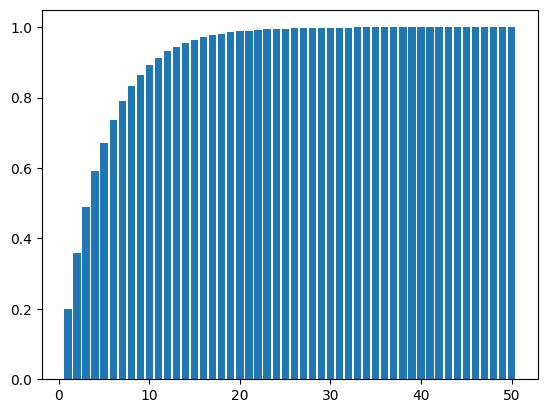

In [15]:
plt.bar(np.arange(1,n+1),geom.cdf(np.arange(1, n+1), p))
plt.show()

Probabilidad de obtener un éxito a lo más en 11 intentos. Si $p=0.2$

In [16]:
geom.cdf(11, p=0.2)

0.91410065408

## **Distribución Poisson**

$X$ tiene distribución Poisson con parámetro $\lambda$ si
$$P(X=k)= \dfrac{\lambda^k}{k!}e^{-\lambda}$$
para $k=0, 1, 2, \dots $

In [17]:
from scipy.stats import poisson

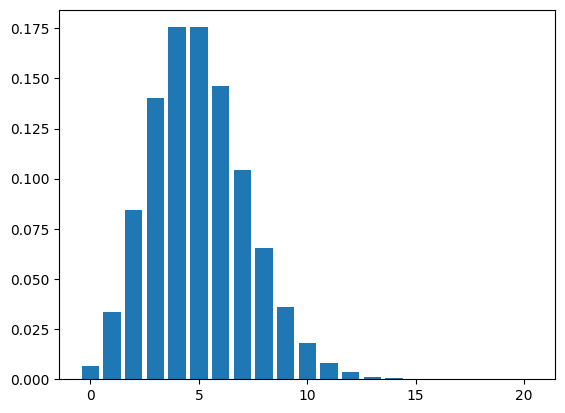

In [18]:
lam=5 # promedio por unidad de tiempo
n=20
plt.bar(np.arange(0,n+1),poisson.pmf(np.arange(0, n+1), mu=lam))
plt.show()

In [19]:
poisson.pmf(4, mu=5)

0.17546736976785063

## **Ejercicio 2:**
Importa el objeto correspondiente a la distribución Poisson y grafica su distribución para $\lambda=2$.

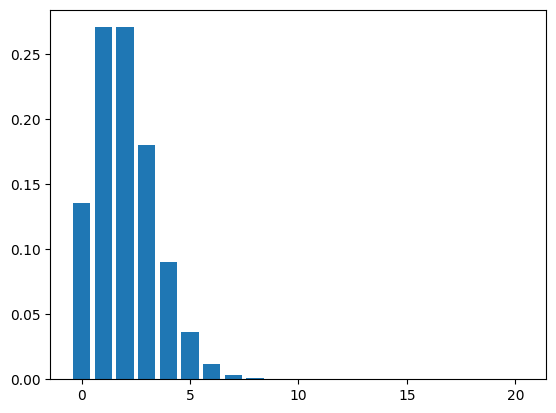

In [20]:
lam=2 # promedio por unidad de tiempo
n=20
plt.bar(np.arange(0,n+1),poisson.pmf(np.arange(0, n+1), mu=lam))
plt.show()

## **Ejercicio 3:**
Cierto restaurante recibe $10$ pedidos por hora en promedio.

a) Calcule la probabilidad de recibir algún pedido en $20$ minutos.

b) ¿Cuál es la máxima cantidad de tiempo que puede transcurrir para poder decir que la probabilidad de no recibir pedidos es por lo menos $0.5$?

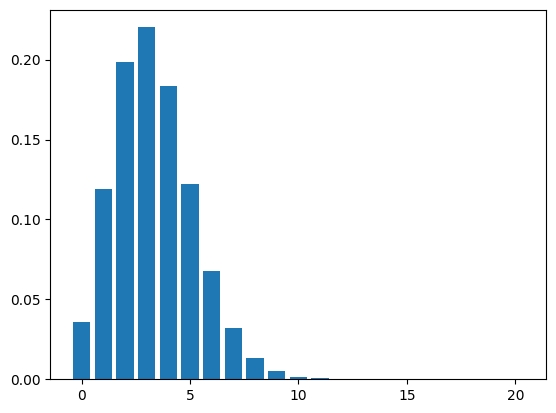

In [22]:
lam=10/3 # promedio por unidad de tiempo
n=20
plt.bar(np.arange(0,n+1),poisson.pmf(np.arange(0, n+1), mu=lam))
plt.show()

In [23]:
1-poisson.pmf(0, mu=lam)

0.9643260066527476

## **Ejercicio 4:**
Un sistema recibe ataques para vulnerarlo de manera aleatoria con un promedio de $100$ ataques por minuto. Halle la probabilidad de que el sistema reciba más de $20$ ataques en un lapso de $10$ segundos.

In [24]:
1-poisson.cdf(20, 100/6)

0.17215995466217549

## Valor esperado

In [3]:
n=10
p = 0.2
valor1 = 0
for x in range(0,6):
  b_value = binom.pmf(x, n, p)
  total = 10*b_value
  print(f"suma 10P(X=x) de x=0 a ", x,"  = ",total)
  valor1+=total
print(valor1)


suma 10P(X=x) de x=0 a  0   =  1.0737418240000003
suma 10P(X=x) de x=0 a  1   =  2.6843545599999996
suma 10P(X=x) de x=0 a  2   =  3.0198988800000004
suma 10P(X=x) de x=0 a  3   =  2.0132659199999994
suma 10P(X=x) de x=0 a  4   =  0.880803839999999
suma 10P(X=x) de x=0 a  5   =  0.2642411519999998
9.936306175999999


In [4]:
n=10
p = 0.2
valor2 = 0
for x in range(6,11):
  b_value = binom.pmf(x, n, p)
  total = 2*x*b_value
  #print(f"P(X>={x}) = {total}")
  valor2+=total
print(valor2)

valor2+valor1

0.07832576000000006


10.014631935999999

## **Ejercicio 5:**

En un juego de apuestas, la probabilidad de ganar S/.10 es 0.4 y la probabilidad de perderlos es 0.6. Halle la ganancia esperada.

Simula este juego 1000 veces y observa la ganancia obtenida.

## **Ejercicio 6:**
La probabilidad de encontrar un artículo defectuoso en una fábrica es $p=0.23$. Asumimos que dichos artículos ocurren independientemente. Deseamos encontrar la cantidad promedio de artículos que debemos inspeccionar hasta encontrar uno defectuoso.

Simula este proceso 1000 veces. Luego observa el promedio de la cantidad de artículos que se tuvo que inspeccionar antes de encontrar el defectuoso.

# Varianza

## **Ejercicio 7:**
Dos posibles inversiones tienen retornos aleatorios $R_1$ y $R_2$. Uno de ellos tiene un riesgo y el otro es una inversión segura.

* $R_1$ tiene valor esperado $\mu_1=0.1$ y desviación estándar $\sigma_1=0.075$.  
* $R_2$ tiene valor esperado $\mu_2=0.03$ y desviación estándar $\sigma_2=0$.  

Si se tiene un capital de $C=1$ para invertir e invierte en proporciones $\pi_1$ y $1-\pi_1$ para $R_1$ y $R_2$, respectivamente. Halle el valor esperado y la varianza de su retorno total.

Simule 1000 escenarios con $C=1$, $\pi_1=0.3$ e indique la distribución del retorno. Asuma que la distribución de $R_1$ es normal.

Esperanza 0.051
Varianza 0.00050625


Text(0, 0.5, 'Densidad')

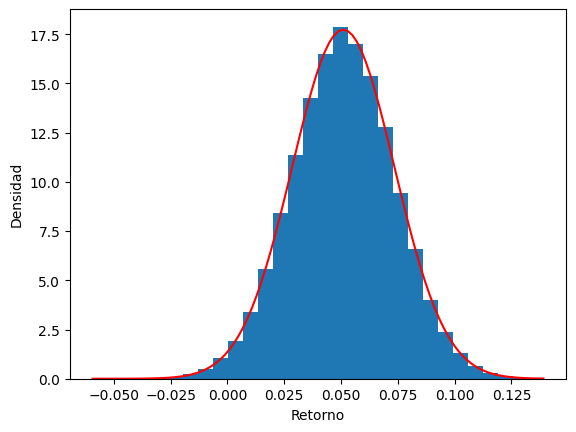

In [5]:
import numpy as np
import matplotlib.pyplot as plt
C = 1
pi1 = 0.3
# Datos para la primera proporción
mu1 = 0.1
sigma1 = 0.075
# Datos para la segunda proporción
mu2 = 0.03
sigma2 = 0.0
esperanza_retorno = pi1 * mu1 + (1 - pi1) * mu2
print("Esperanza", esperanza_retorno)
varianza = (pi1**2) * (sigma1**2) + ((1 - pi1)**2) * (sigma2**2)
print("Varianza",varianza)
# Simulación
R1 = np.random.normal(mu1, sigma1, 100000)
R2 = np.random.normal(mu2, sigma2, 100000)
R = pi1 * R1 + (1 - pi1) * R2
# Graficar la distribución del retorno
plt.hist(R, bins=30, density=True)
x = np.linspace(min(R), max(R), 100)
plt.plot(x, 1 / (np.sqrt(2 * np.pi * varianza)) * np.exp(-(x - esperanza_retorno)**2 / (2 * varianza)), 'r-', label='Distribución normal')
plt.xlabel('Retorno')
plt.ylabel('Densidad')

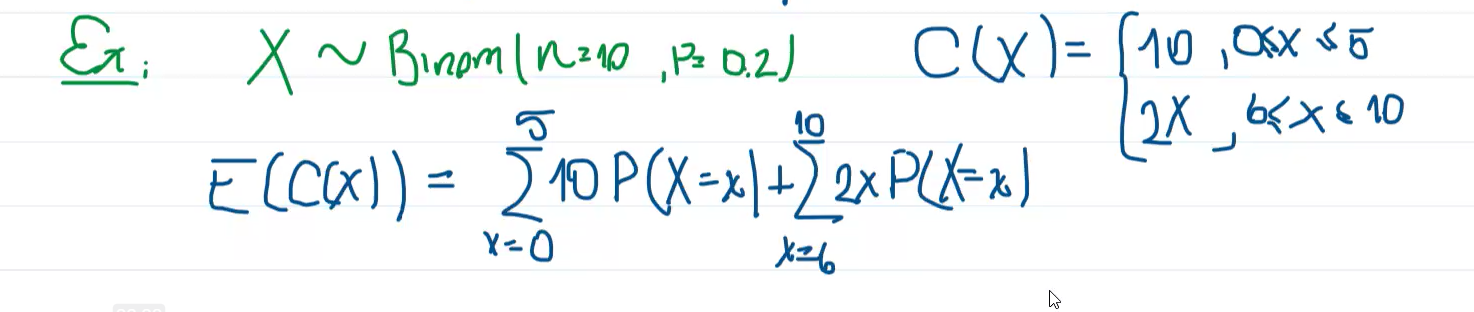

In [12]:
from scipy.stats import binom


In [17]:
#Calculo binomial
n = 10
p = 0.2
sum1 = 0
sum2 = 0
for i in range(0, 6):
  sum1 += (10* binom.pmf(i, n, p))

for i in range(6,11):
  sum2 += (2*i*binom.pmf(i, n, p))

print(sum1+sum2)


10.014631935999999
